In [ ]:
%pip install datasets
%pip install jinja2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import setuptools.dist
from yellowbrick.cluster import silhouette_visualizer 
import matplotlib
import matplotlib.font_manager
import sklearn.datasets

In [ ]:
# cluster electricity data from Australia
# https://www.openml.org/search?type=data&sort=runs&id=151&status=active
from datasets import load_dataset
electricity = load_dataset('inria-soda/tabular-benchmark', data_files='clf_num/electricity.csv')
electricity

In [ ]:
elec = electricity['train'].to_pandas()
elec

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.898987,0.957447,0.068632,0.568283,0.004456,0.456499,0.644737,DOWN
1,0.867616,0.234043,0.033716,0.337102,0.001672,0.329622,0.846930,DOWN
2,0.009159,0.255319,0.059175,0.185808,0.003467,0.422915,0.414912,DOWN
3,0.898987,0.531915,0.087577,0.539572,0.004936,0.637752,0.491667,DOWN
4,0.868280,0.085106,0.027021,0.165129,0.001271,0.265924,0.748246,DOWN
...,...,...,...,...,...,...,...,...
38469,0.915800,0.404255,0.077549,0.456263,0.005332,0.378560,0.356140,UP
38470,0.915800,0.425532,0.074397,0.444213,0.005110,0.377525,0.369737,UP
38471,0.915800,0.468085,0.072835,0.423386,0.005019,0.354480,0.380263,UP
38472,0.915800,0.829787,0.065420,0.353913,0.004508,0.319524,0.319737,UP


In [6]:
X = elec.drop(columns=['class'])

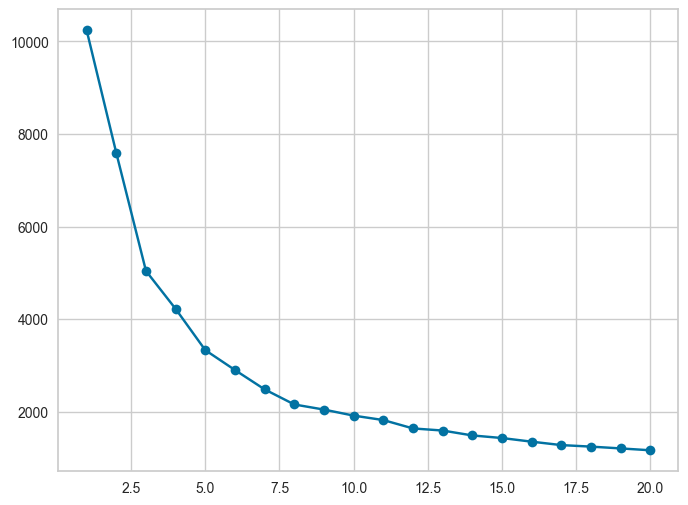

In [10]:
# get inertias for different numbers of clusters
# do this to determine number of clusters we want
inertias = []
max_clusters = 20
for i in range(max_clusters):
    km = KMeans(n_clusters=i+1, n_init='auto',
                max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, max_clusters+1), inertias, marker='o')

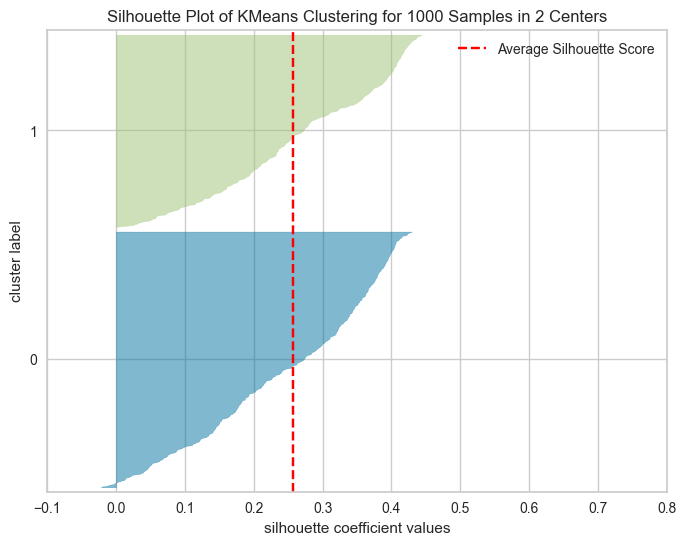

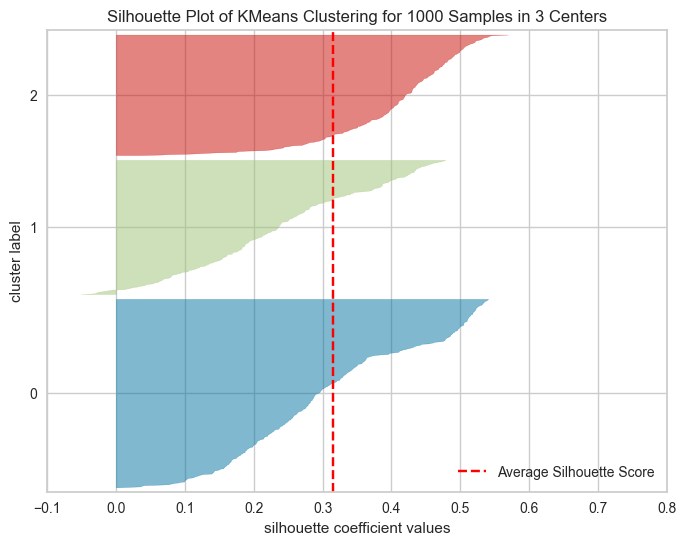

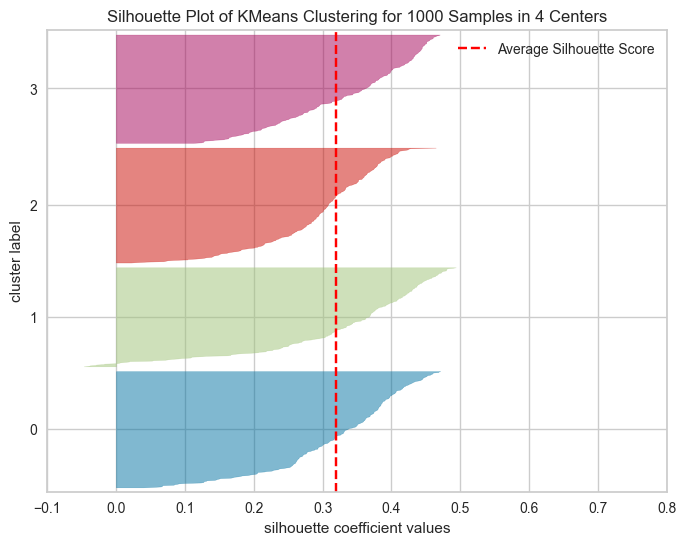

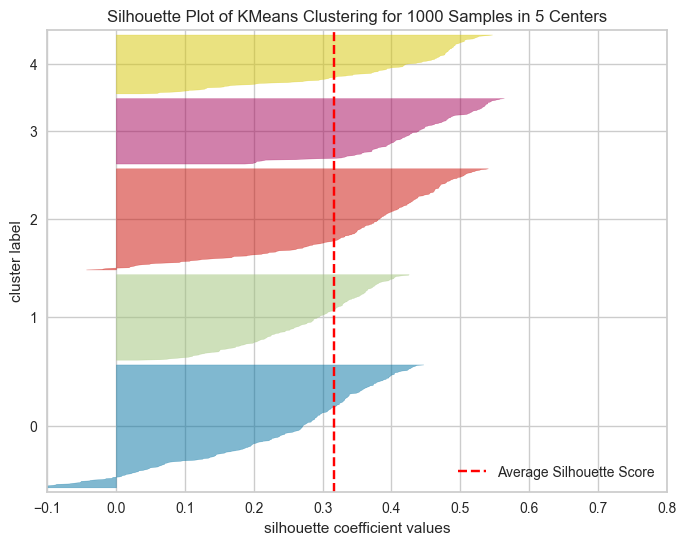

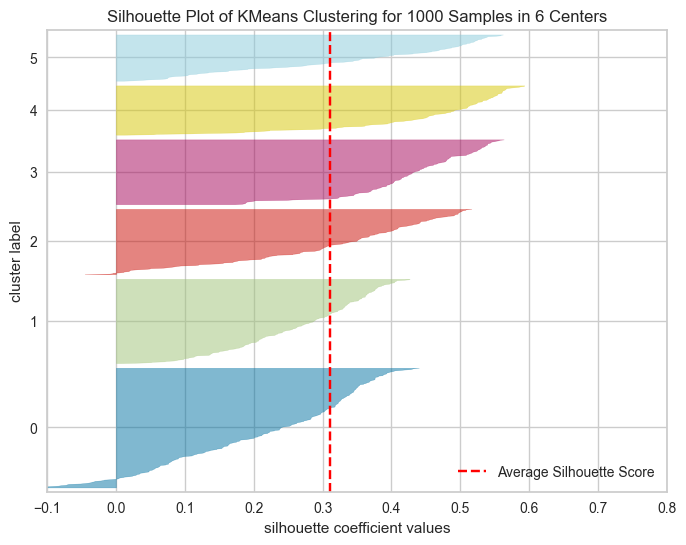

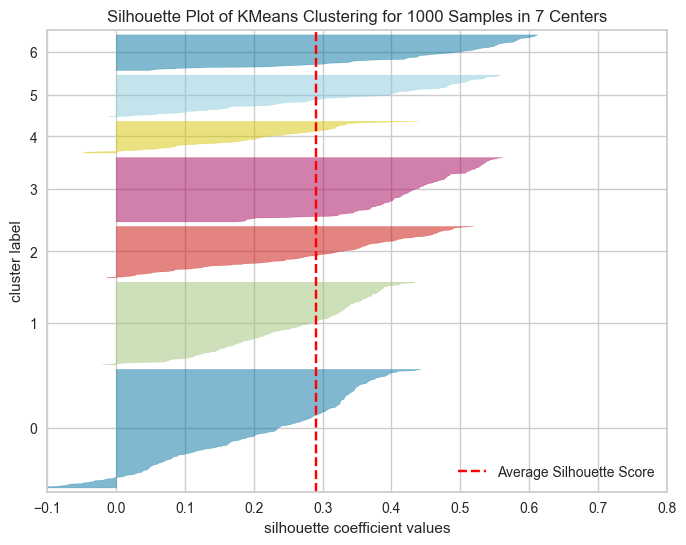

In [11]:
# Takes 2min 20s w/o sampling
# get silhouette scores for different numbers of clusters
from yellowbrick.cluster import silhouette_visualizer

max_clusters = 6
for i in range(max_clusters):
    km = KMeans(n_clusters=i+2, n_init='auto',
                max_iter=300, random_state=42)

    fig, ax = plt.subplots(figsize=(8, 6))
    # setting show=False so we can set xlim to same value for all plots
    viz = silhouette_visualizer(km, X.sample(1_000, random_state=42), colors='yellowbrick', ax=ax, show=False)
    ax.set_xlim([-0.1, .8])

In [ ]:
# going to choose 5 clusters (if 5, 6, or 7 are all close, choose the simpler model)
# summarize the results by group

km = KMeans(n_clusters=5, n_init='auto',
            max_iter=300, random_state=42)
km.fit(X)
label = km.predict(X)
(elec
 .assign(cluster=label)
 .groupby('cluster')
 .agg('mean', numeric_only=True)
 .T # transpose
 .style
 .background_gradient(cmap='RdBu', axis='columns')
)

cluster,0,1,2,3,4
date,0.887881,0.449859,0.289463,0.016236,0.892885
period,0.206473,0.671091,0.163150,0.652753,0.678055
nswprice,0.045310,0.059600,0.050946,0.078439,0.063094
nswdemand,0.310528,0.499305,0.276622,0.484675,0.529125
vicprice,0.002687,0.004014,0.002967,0.003467,0.004172
vicdemand,0.327880,0.447320,0.376267,0.422915,0.510550
transfer,0.679200,0.461236,0.484567,0.414912,0.509617


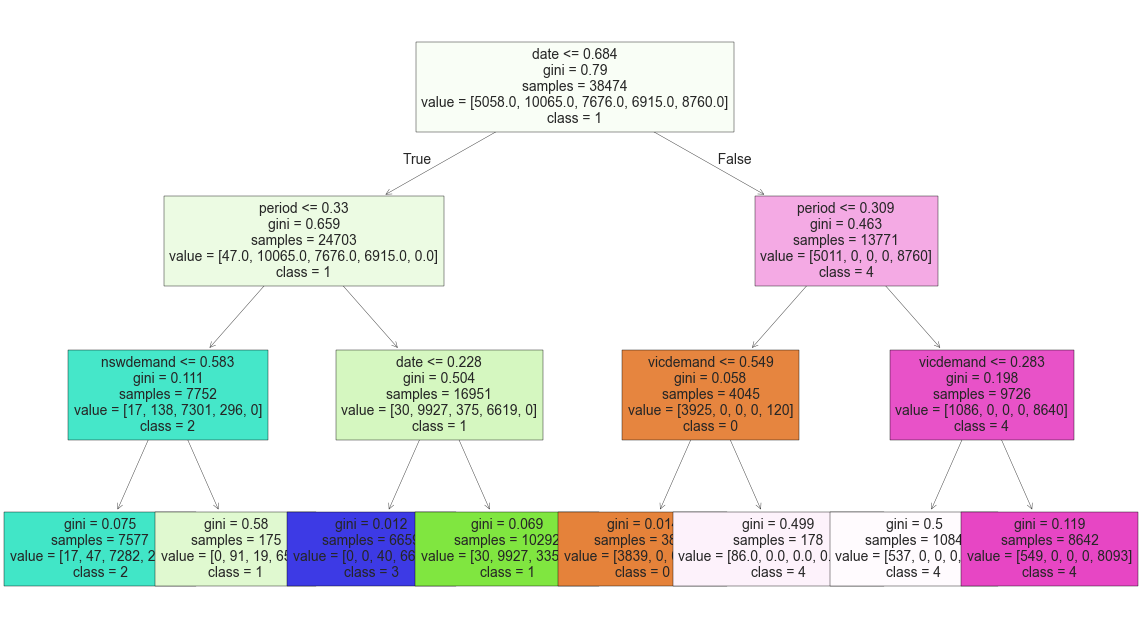

In [15]:
# Summarize by surrogate model decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, label)
# plot the tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(14, 8))
# make string for class names
class_names = [str(i) for i in range(0, 5)]
_ = plot_tree(dt, ax=ax, feature_names=X.columns, class_names=class_names, filled=True, fontsize=10)